In [6]:
import numpy as np
import csv
from matplotlib import cm
import matplotlib.pyplot as plt
import copy

import analysis_utils
import importlib
importlib.reload(analysis_utils)

<module 'analysis_utils' from 'c:\\Users\\Monit Sharma\\Dropbox\\My PC (LAPTOP-K0D5CN56)\\Downloads\\ibm\\Evidence-for-the-utility-of-quantum-computing-before-fault-tolerance-main\\analysis_utils.py'>

# Fig. 2a

### load data

In [7]:
sfacs = [1, 1.2, 1.6]; nsfacs = len(sfacs)
nbootstrap = 100
fit_orders = [1, 'exp']; nfits = len(fit_orders)
nbins = 20

# load bootstrap, unmitigated data
data_bootstrap_unmit = []
with open("data/fig2a_bootstrap_unmit.txt", 'r') as f:
    for d in csv.reader(f):
        data_bootstrap_unmit.append(d)
data_bootstrap_unmit = [float(d) for d in data_bootstrap_unmit[0]] # it is only one line of data
data_bootstrap_unmit = np.array(data_bootstrap_unmit).reshape((nbins, nsfacs, nbootstrap))

# load bootstrap, mitigated data
data_bootstrap_mit = []
with open("data/fig2a_bootstrap_mit.txt", 'r') as f:
    for d in csv.reader(f):
        data_bootstrap_mit.append(d)
data_bootstrap_mit = [float(d) for d in data_bootstrap_mit[0]] # it is only one line of data
data_bootstrap_mit = np.array(data_bootstrap_mit).reshape((nfits, nbins, nbootstrap))

# load experimental, unmitigated data
data_exp_unmit = []
with open("data/fig2a_experiment_unmit.txt", 'r') as f:
    for d in csv.reader(f):
        data_exp_unmit.append(d)
data_exp_unmit = [float(d) for d in data_exp_unmit[0]] # it is only one line of data
data_exp_unmit = np.array(data_exp_unmit).reshape((nbins, nsfacs))

# load experimental, mitigated data
data_exp_mit = []
with open("data/fig2a_experiment_mit.txt", 'r') as f:
    for d in csv.reader(f):
        data_exp_mit.append(d)
data_exp_mit = [float(d) for d in data_exp_mit[0]] # it is only one line of data
data_exp_mit = np.array(data_exp_mit).reshape((nbins, nfits, 2)) # the last 2 is value/fit uncertainty

### Fig. 2a first plot

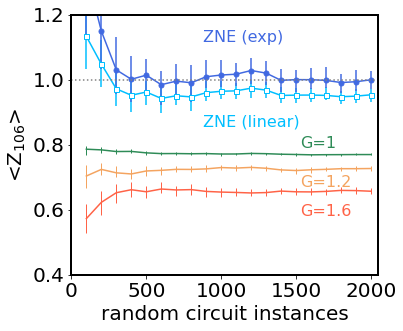

In [8]:
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 2

qubit_of_interest=106
ylabel='<Z$_{'+str(qubit_of_interest)+'}$>'

xfac=100 # each bin represents 100 circuit instances
ylim=[0.4, 1.2]
# ylim=[0.0, 1.2]
xlim=[0, 2050]
percentile_=68.2
criteria=0.5

percentile=50 + percentile_/2.0 #percentile_ + (100-percentile_)/2.0

ncol=1; nrow=1
fig, axes = plt.subplots(nrow,ncol, figsize=(6*ncol,5*nrow))

colors = ['seagreen', 'sandybrown', 'tomato']
color_exp='royalblue'
color_lin='deepskyblue'

ax=axes

x = np.array(list(range(1, nbins+1)))*xfac

# plot bootstrapped values
y_unmit = [[] for sfac in sfacs]
y_unmit_err = [[] for sfac in sfacs]
y_mit = [[] for i in range(len(fit_orders))]
y_mit_err = [[] for i in range(len(fit_orders))]
for i in range(0,nbins):
    for j in range(len(sfacs)):
        vals = data_bootstrap_unmit[i][j]
        med = np.median(vals)
        err = [ med-np.percentile(vals, 100-percentile), np.percentile(vals, percentile)-med ]
        y_unmit[j].append(med)
        y_unmit_err[j].append(err)
    
yoffset=[0.02, -0.055, -0.075]
for i, sfac in enumerate(sfacs):
    color=colors[i]
    y = y_unmit[i]
    yerr = np.array(y_unmit_err[i]).transpose()
    ax.errorbar(x, y, yerr=yerr, color=color, label='unmitigated (G={})'.format(sfac), linewidth=1, fmt='', linestyle='')
    y = np.array(data_exp_unmit)[:,i]
    ax.plot(x, y, color=color)
    ax.text(x[-4]*0.9, y[-1]+yoffset[i], f'G={sfac}', fontsize=16, color=color)

i = 0 # linear fit
color=color_lin
y    = np.median(data_bootstrap_mit[i], axis=1)
yerr = np.array([y - np.percentile(data_bootstrap_mit[i], 100-percentile, axis=1), np.percentile(data_bootstrap_mit[i], percentile, axis=1)- y])
ax.errorbar(x, y, yerr=yerr, 
            color=color, fmt='', linestyle='')
y = np.array(data_exp_mit)[:,i,0]
ax.plot(x, y, color=color, marker='s', markersize=5, label='mitigated (linear)', mfc='white')
k = int(len(x)/2)
ax.text(x[k]*0.8, y[k]-0.11, 'ZNE (linear)', fontsize=16, color=color)

i = 1 # exponential fit
color=color_exp
y    = np.median(data_bootstrap_mit[i], axis=1)
yerr = np.array([y - np.percentile(data_bootstrap_mit[i], 100-percentile, axis=1), np.percentile(data_bootstrap_mit[i], percentile, axis=1)- y])
ax.errorbar(x, y, yerr=yerr, 
            color=color, fmt='', linestyle='')
y = np.array(data_exp_mit)[:,i,0]
ax.plot(x, y, color=color, marker='o', markersize=5, label='mitigated (exp)')
k = int(len(x)/2)
ax.text(x[k]*0.8, y[k]+0.1, 'ZNE (exp)', fontsize=16, color=color)

ax.axhline(1, color='grey', linestyle=':', label='ideal')

ax.set_xticks([0, 500, 1000, 1500, 2000])
ax.set_ylim(ylim)
ax.set_xlim(xlim)
ax.set_ylabel(ylabel)
ax.set_xlabel('random circuit instances')
plt.tight_layout()
plt.show()

### Fig. 2a second plot

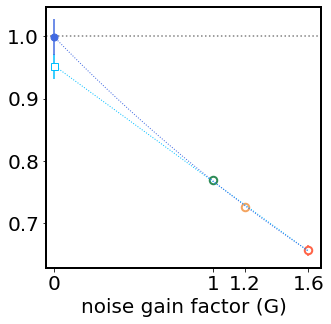

In [9]:
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 2

xlim=[-0.05, sfacs[-1]*1.05]
colors1=cm.Blues(np.linspace(0.4, 0.9, 3))

ncol=1; nrow=1
fig, axes = plt.subplots(nrow,ncol, figsize=(5*ncol,4.9*nrow))
ax=axes

ax.axhline(1, color='grey', linestyle=':', label='ideal')
for i, (color, x, y, yerr) in enumerate(zip(colors, sfacs, np.array(y_unmit)[:,-1], np.array(y_unmit_err)[:,-1])):
    ax.errorbar(x, y, yerr=[[yerr[0]], [yerr[1]]], 
                color=color, linestyle='none')
    y = np.array(data_exp_unmit)[-1,i]
    ax.plot(x, y, color=color, mfc='white', marker='.', markersize=15, markeredgewidth=2, linestyle='none')

# plot fitting
markers={1: 's', 2: '^', 'exp': 'o'}
xfit = np.linspace(0, np.max(sfacs), 21)

fit_order=1; i=0
yfit_=[]
y = np.array(data_exp_unmit)[-1,:]
popt, unctty = analysis_utils.fit(sfacs, y, order=fit_order)
yfit = analysis_utils.fit_eval(xfit, *popt, order=fit_order)
ax.plot(xfit, yfit, color=color_lin, alpha=1, linewidth=1, linestyle=':')
ymed=np.mean(data_bootstrap_mit[i][-1])
yerr=np.array([ymed - np.percentile(data_bootstrap_mit[i][-1], 100-percentile), np.percentile(data_bootstrap_mit[i][-1], percentile)- ymed])
ax.errorbar([0], [ymed], yerr=[[yerr[0]], [yerr[1]]], 
            color=color_lin, linestyle='none')
y = np.array(data_exp_mit)[-1,i,0]
ax.plot(0, y, color=color_lin, marker=markers[fit_order], markersize=7, mfc='white', linestyle='none')

fit_order='exp'; i=1
yfit_=[]
y = np.array(data_exp_unmit)[-1,:]
popt, unctty = analysis_utils.fit(sfacs, y, order=fit_order)
yfit = analysis_utils.fit_eval(xfit, *popt, order=fit_order)
ax.plot(xfit, yfit, color=color_exp, alpha=1, linewidth=1, linestyle=':')
ymed=np.mean(data_bootstrap_mit[i][-1])
yerr=np.array([ymed - np.percentile(data_bootstrap_mit[i][-1], 100-percentile), np.percentile(data_bootstrap_mit[i][-1], percentile)- ymed])
ax.errorbar([0], [ymed], yerr=[[yerr[0]], [yerr[1]]], 
            color=color_exp, linestyle='none')
y = np.array(data_exp_mit)[-1,i,0]
ax.plot(0, y, color=color_exp, marker=markers[fit_order], markersize=7, linestyle='none')

ax.set_xlim(xlim)
#ax.set_xticks([0]+sfacs, labels=['0', '1', '1.2', '1.6'])
ax.set_xticks([0]+sfacs);ax.set_xticklabels(['0', '1', '1.2', '1.6'])

ax.set_xlabel('noise gain factor (G)')

plt.tight_layout()
plt.show()

# Fig. 2b

### load data

In [10]:
sfacs = [1, 1.2, 1.6]; nsfacs = len(sfacs)
nbootstrap = 100
fit_orders = [1, 'exp']; nfits = len(fit_orders)
depths = [4, 8, 12, 16, 20]; ndepth = len(depths)
nqubits = 127

# load bootstrap, unmitigated data
data_bootstrap_unmit = []
with open("data/fig2bc_bootstrap_unmit.txt", 'r') as f:
    for d in csv.reader(f):
        data_bootstrap_unmit.append(d)
data_bootstrap_unmit = [float(d) for d in data_bootstrap_unmit[0]] # it is only one line of data
data_bootstrap_unmit = np.array(data_bootstrap_unmit).reshape((ndepth, nqubits, nsfacs, nbootstrap))

# load bootstrap, mitigated data
data_bootstrap_mit = []
with open("data/fig2bc_bootstrap_mit.txt", 'r') as f:
    for d in csv.reader(f):
        data_bootstrap_mit.append(d)
data_bootstrap_mit = [float(d) for d in data_bootstrap_mit[0]] # it is only one line of data
data_bootstrap_mit = np.array(data_bootstrap_mit).reshape((ndepth, nqubits, nbootstrap, nfits, 2)) # the last 2 is value/fit uncertainty

# load experimental, unmitigated data
data_exp_unmit = []
with open("data/fig2bc_experiment_unmit.txt", 'r') as f:
    for d in csv.reader(f):
        data_exp_unmit.append(d)
data_exp_unmit = [float(d) for d in data_exp_unmit[0]] # it is only one line of data
data_exp_unmit = np.array(data_exp_unmit).reshape((ndepth, nqubits, nsfacs))

# load experimental, mitigated data
data_exp_mit = []
with open("data/fig2bc_experiment_mit.txt", 'r') as f:
    for d in csv.reader(f):
        data_exp_mit.append(d)
data_exp_mit = [float(d) for d in data_exp_mit[0]] # it is only one line of data
data_exp_mit = np.array(data_exp_mit).reshape((ndepth, nqubits, nfits, 2)) # the last 2 is value/fit uncertainty

# load corresponding pauli string (1th qubit --- 127th qubit order)
paulis = []
with open("data/fig2bc_paulis.txt", 'r') as f:
    for d in csv.reader(f):
        paulis.append(d)
# it is only one line of data so take 0th in the list
paulis = [p.replace(' ', '') for p in paulis[0]] # make sure to remove whitespace padding

### post process data

In [11]:
idx_sfac1 = sfacs.index(1)
criteria = 0.5 # criteria for fit uncertainty to accept or reject

idx_depth = depths.index(4)

# process bootstrap results - unmitigated data
unmit_c1 = np.array(data_bootstrap_unmit)[:,:,idx_sfac1,:]
unmit_median = np.median(data_bootstrap_unmit, axis=3)[idx_depth,:,idx_sfac1]
unmit_error_low = np.percentile(data_bootstrap_unmit, 100-percentile, axis=3)[idx_depth,:,idx_sfac1]
unmit_error_high = np.percentile(data_bootstrap_unmit, percentile, axis=3)[idx_depth,:,idx_sfac1]
a=unmit_median
b=unmit_error_low
c=unmit_error_high
unmit_plot = [a, [a-b,c-a]]

a = np.median(np.mean(unmit_c1, axis=1), axis=1)[idx_depth]
b = np.percentile(np.mean(unmit_c1, axis=1), 100-percentile, axis=1)[idx_depth]
c = np.percentile(np.mean(unmit_c1, axis=1), percentile, axis=1)[idx_depth]
unmit_avg_plot = [a, [a-b,c-a]]

# process bootstrap results - mitigated data
mit_best=copy.copy(unmit_c1[idx_depth, :])

for j in range(nqubits):
    for k in range(nfits):
        # progressively upgrade the results if fit uncertainty meets criteria
        # as is described in supplementary information
        tmp = np.where(data_bootstrap_mit[idx_depth,j,:,k,1] < criteria)[0]
        mit_best[j,tmp] = data_bootstrap_mit[idx_depth,j,tmp,k,0]

a = np.median(mit_best, axis=1)
b = np.percentile(mit_best, 100-percentile, axis=1)
c = np.percentile(mit_best, percentile, axis=1)
mit_plot = [a, [a-b,c-a]]

a = np.median(np.mean(mit_best, axis=0))
b = np.percentile(np.mean(mit_best, axis=0), 100-percentile)
c = np.percentile(np.mean(mit_best, axis=0), percentile)
mit_avg_plot = [a, [a-b,c-a]]

# process experimental results - mitigated data
mit_best_exp = copy.copy(data_exp_unmit[idx_depth, :, 0]) # start with G=1 case
for k in range(nfits):
    # progressively upgrade the results if fit uncertainty meets criteria
    # as is described in supplementary information
    tmp = np.where(data_exp_mit[idx_depth,:,k,1] < criteria)[0]
    mit_best_exp[tmp] = data_exp_mit[idx_depth,tmp, k, 0] 

### plot

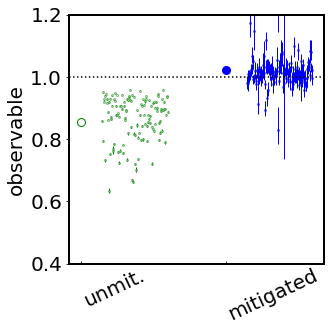

In [12]:
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 2

kwargs_c1={'color': 'g', 'fmt': '', 'linestyle': '', 'elinewidth': 1}
kwargs_best={'color': 'blue', 'fmt': '', 'linestyle': '', 'elinewidth': 1}

kwargs_c1_exp={'color': 'g', 'marker': 'o', 'mfc': 'white', 'linestyle': '',}
kwargs_best_exp={'color': 'blue', 'marker': 'o', 'linestyle': '',}

plot_formats=[kwargs_c1, kwargs_best]
plot_exp_formats=[kwargs_c1_exp, kwargs_best_exp]
plot_data=[unmit_plot, mit_plot]
plot_exp_data=[data_exp_unmit[idx_depth, :, 0], mit_best_exp]
plot_avg_data=[unmit_avg_plot, mit_avg_plot]
plot_orders=[0, 'best']
plot_labels=['unmit.', 'mitigated']
plot_orders_str = ','.join([str(order) for order in plot_orders])

ylabel='observable'

ncol=1; nrow=1
fig, axes = plt.subplots(nrow,ncol, figsize=(5*ncol,5*nrow))
ax=axes
for i, (plot_d, plot_avg_d, plot_e, plot_format, plot_exp_format) in enumerate(zip(plot_data, plot_avg_data, plot_exp_data, plot_formats, plot_exp_formats)):
    y, yerr = plot_d

    xoffset = np.linspace(0.15+i, 0.6+i, len(y))
    ax.errorbar(xoffset, y, yerr=np.array(yerr), **plot_format)
    plot_format_ = copy.copy(plot_exp_format)
    plot_format_['alpha']=0.5
    plot_format_['markersize']=2
    ax.plot(xoffset, plot_e, **plot_format_)
    
    yval, yval_err = plot_avg_d
    ax.errorbar([i], [yval], yerr=[[yval_err[0]], [yval_err[1]]], **plot_format)
    plot_format_ = copy.copy(plot_exp_format)
    plot_format_['markersize']=8
    ax.plot([i], [np.mean(plot_e)], **plot_format_)
ax.set_ylabel(ylabel)
ax.set_ylim(ylim)

ax.axhline(1, color='k', linestyle=':')
plot_labels_tmp=['', '']
#ax.set_xticks(range(len(plot_orders)), plot_labels_tmp)
#ax.set_xticks(range(len(plot_orders)), plot_labels_tmp, rotation=45, ha='left', va='top')
#ax.set_xticks(range(len(plot_orders)), plot_labels, ha='left', va='top', rotation=25)
ax.set_xticks(range(len(plot_orders)));ax.set_xticklabels(plot_labels, ha='left', va='top', rotation=25)
ax.tick_params(axis='x',which='both',direction='in',right=True, pad = 2)
# ax.text(0, 0.03, 'unmitigated')
# ax.text(1, 0.03, 'mitigated', color='b')
fontdict = {
 'verticalalignment': 'top',
}

#ax.set_xticklabels(plot_labels, fontdict = fontdict)
#ax.tick_params(axis='x', direction='in')

plt.tight_layout()
plt.show()

# Fig. 2c

### load data

In [13]:
sfacs = [1, 1.2, 1.6]; nsfacs = len(sfacs)
nbootstrap = 100
fit_orders = [1, 'exp']; nfits = len(fit_orders)
depths = [4, 8, 12, 16, 20]; ndepth = len(depths)
nqubits = 127

# load bootstrap, unmitigated data
data_bootstrap_unmit = []
with open("data/fig2bc_bootstrap_unmit.txt", 'r') as f:
    for d in csv.reader(f):
        data_bootstrap_unmit.append(d)
data_bootstrap_unmit = [float(d) for d in data_bootstrap_unmit[0]] # it is only one line of data
data_bootstrap_unmit = np.array(data_bootstrap_unmit).reshape((ndepth, nqubits, nsfacs, nbootstrap))

# load bootstrap, mitigated data
data_bootstrap_mit = []
with open("data/fig2bc_bootstrap_mit.txt", 'r') as f:
    for d in csv.reader(f):
        data_bootstrap_mit.append(d)
data_bootstrap_mit = [float(d) for d in data_bootstrap_mit[0]] # it is only one line of data
data_bootstrap_mit = np.array(data_bootstrap_mit).reshape((ndepth, nqubits, nbootstrap, nfits, 2)) # the last 2 is value/fit uncertainty

# load experimental, unmitigated data
data_exp_unmit = []
with open("data/fig2bc_experiment_unmit.txt", 'r') as f:
    for d in csv.reader(f):
        data_exp_unmit.append(d)
data_exp_unmit = [float(d) for d in data_exp_unmit[0]] # it is only one line of data
data_exp_unmit = np.array(data_exp_unmit).reshape((ndepth, nqubits, nsfacs))

# load experimental, mitigated data
data_exp_mit = []
with open("data/fig2bc_experiment_mit.txt", 'r') as f:
    for d in csv.reader(f):
        data_exp_mit.append(d)
data_exp_mit = [float(d) for d in data_exp_mit[0]] # it is only one line of data
data_exp_mit = np.array(data_exp_mit).reshape((ndepth, nqubits, nfits, 2)) # the last 2 is value/fit uncertainty

# load corresponding pauli string (1th qubit --- 127th qubit order)
paulis = []
with open("data/fig2bc_paulis.txt", 'r') as f:
    for d in csv.reader(f):
        paulis.append(d)
paulis = paulis[0] # it is only one line of data

In [14]:
import copy

criteria=0.5
idx_sfac1 = sfacs.index(1)
unmit_c1 = np.mean(np.array(data_bootstrap_unmit)[:,:,idx_sfac1,:], axis=1)
unmit_median = np.median(unmit_c1, axis=1)
unmit_error_low = np.percentile(unmit_c1, 100-percentile, axis=1)
unmit_error_high = np.percentile(unmit_c1, percentile, axis=1)
a=unmit_median
b=unmit_error_low
c=unmit_error_high
unmit_plot = [a, [a-b,c-a]]

mit_best=copy.copy(data_bootstrap_unmit[:,:,idx_sfac1,:])

for i in range(ndepth):
    for j in range(nqubits):
        for k in range(nfits):
            # progressively upgrade the results if fit uncertainty meets criteria
            # as is described in supplementary information
            tmp = np.where(data_bootstrap_mit[i,j,:,k,1] < criteria)[0]
            mit_best[i,j,tmp] = data_bootstrap_mit[i,j,tmp,k,0]

tmp=np.mean(mit_best, axis=1)
a = np.median(tmp, axis=1)
b = np.percentile(tmp, 100-percentile, axis=1)
c = np.percentile(tmp, percentile, axis=1)
mit_plot = [a, [a-b,c-a]]

yideal=1
vals = np.median(mit_best, axis=2)

# experimental results
mit_best_exp = copy.copy(data_exp_unmit[:, :, 0])
for k in range(nfits):
    mask_ = np.where(data_exp_mit[:,:,k,1] < criteria)
    tmp = data_exp_mit[:, :, k, 0]
    mit_best_exp[mask_] = tmp[mask_]

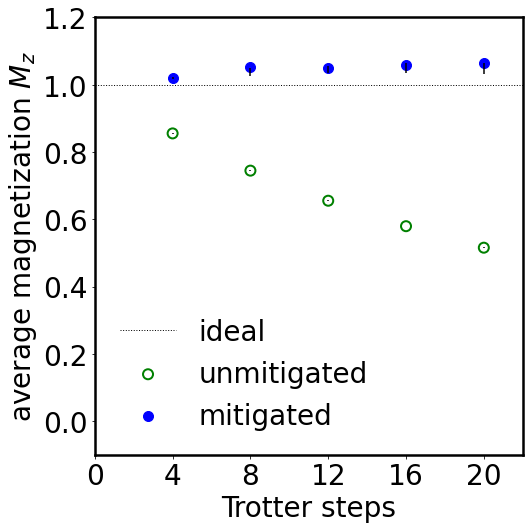

In [15]:
plt.rcParams['font.size'] = 28
plt.rcParams['axes.linewidth'] = 2.5

markersize=100

kwargs_c1={'color': 'g', 'fmt': '', 'linestyle': '', 'ecolor': 'black', 'barsabove': True}
kwargs_fit={'color': 'blue', 'fmt': '', 'linestyle': '', 'ecolor': 'black', 'barsabove': True}

kwargs_c1_exp={'label': 'unmitigated',
               'color': 'g', 'marker': 'o', 's': markersize, 'facecolors': 'none',
               'linewidths': 2.0}
kwargs_fit_exp={'label': 'mitigated', 's': markersize,
                'color': 'blue', 'marker': 'o'}

plot_orders=[0, 'best']
plot_orders_str = ','.join([str(order) for order in plot_orders])
plot_formats=[kwargs_c1, kwargs_fit]

xlabel='Trotter steps'
ylabel='average magnetization $M_z$'

ylim=[-0.1, 1.2]
xlim=[0, 22]
yideal=1
  
xmin=0.2; xmax=0.4;

ncol=1; nrow=1
fig, axes = plt.subplots(nrow,ncol, figsize=(8*ncol,8*nrow))
ax=axes
ax.axhline(1, color='k', linestyle=':', linewidth=1, label='ideal')

yvals_mean=unmit_plot[0]
yvals_err=unmit_plot[1]
plot_format=kwargs_c1
ax.errorbar(depths, yvals_mean, yerr=yvals_err, **plot_format)
y = np.mean(data_exp_unmit[:,:,0], axis=1)
ax.scatter(depths, y, **kwargs_c1_exp)

yvals_mean=mit_plot[0]
yvals_err=mit_plot[1]
plot_format=kwargs_fit
ax.errorbar(depths, yvals_mean, yerr=yvals_err, **plot_format)
y = np.mean(mit_best_exp[:,:], axis=1)
ax.scatter(depths, y, **kwargs_fit_exp)

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_ylim(ylim)
ax.set_xlim(xlim)

ax.legend(frameon=False, loc='lower left')

ax.set_xticks([0] + list(depths))

plt.tight_layout()
plt.show()